In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mtpl

def plotter(var_i, varNames, rate = 2, F = None, ze = None, znu = None, phi = None):
    x = np.linspace(-3,3,1000)
    for name in varNames:
        data = np.loadtxt(f"build/{var_i}{name}_maxF_test.txt")
        fig, axs = plt.subplots(1,3,figsize = (12,4))
        for ax in axs:
            ax.set_xlabel(name,size=16)
            ax.tick_params("both",labelsize=10)
        axs[1].set_ylim([-1.2,1.2])
        axs[2].set_ylim([-np.pi-0.5,np.pi+0.5])
        axs[0].set_ylabel("F",size=16)
        axs[1].set_ylabel("z",size=16)
        axs[2].set_ylabel("$\\phi$ (rad)",size=16)
        axs[0].plot(data[::rate,0],data[::rate,1],"x",markersize = 8)
        if F != None:
            axs[0].plot(x,F(name,x),linewidth = 1.5)
        axs[1].plot(data[::rate,0],data[::rate,2],"x",markersize = 8)
        axs[1].plot(data[::rate,0],data[::rate,3],"+",markersize = 8)
        if ze != None:
            axs[1].plot(x,ze(name,x),linewidth = 1.5)
        if znu != None:
            axs[1].plot(x,znu(name,x),linewidth = 1.5)
        axs[2].plot(data[::rate,0],data[::rate,4],"x",markersize = 8)
        if phi != None:
            axs[2].plot(x,phi(name,x),linewidth = 1.5)
        fig.tight_layout()
        fig.savefig(f"plots/{var_i}{name}_maxF.png")
        plt.show()

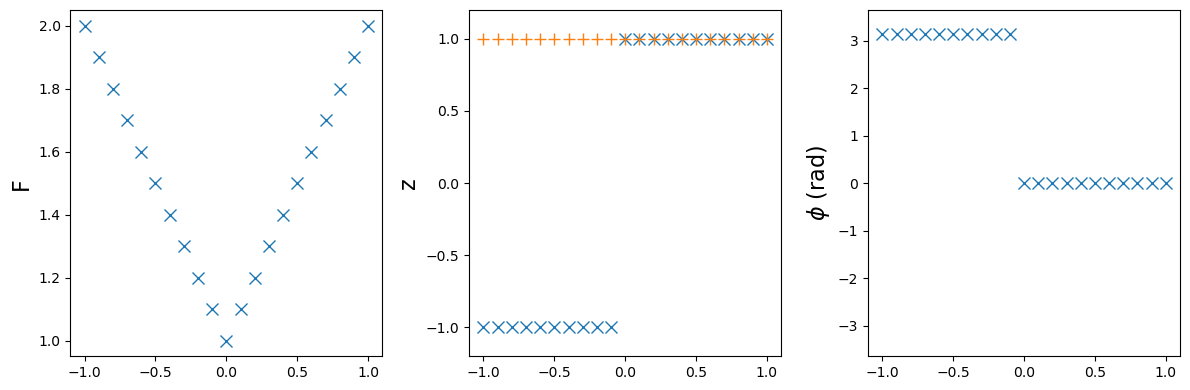

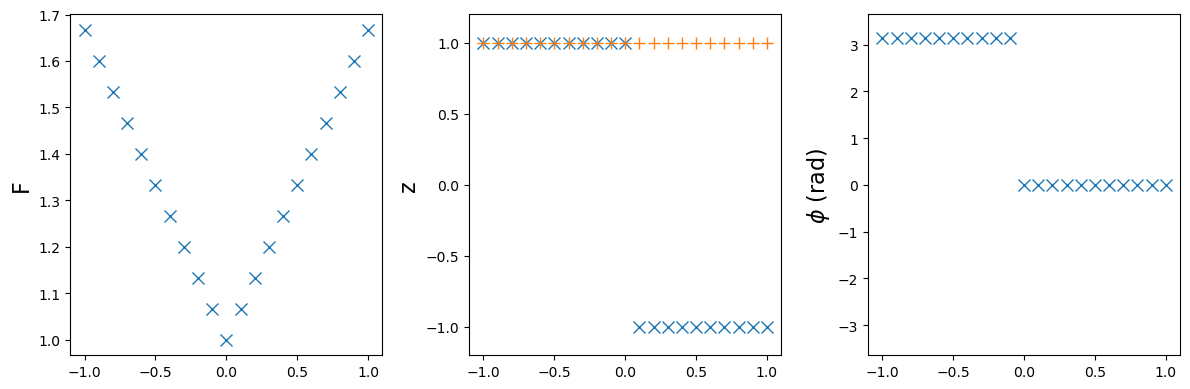

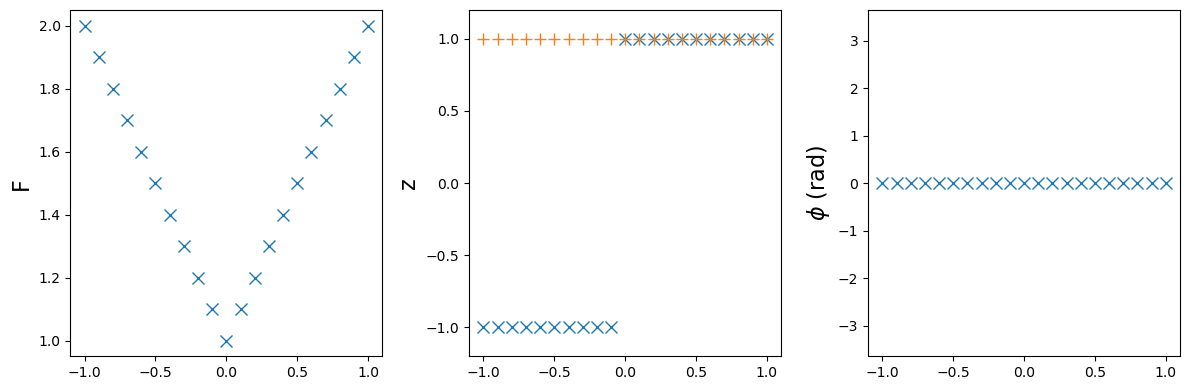

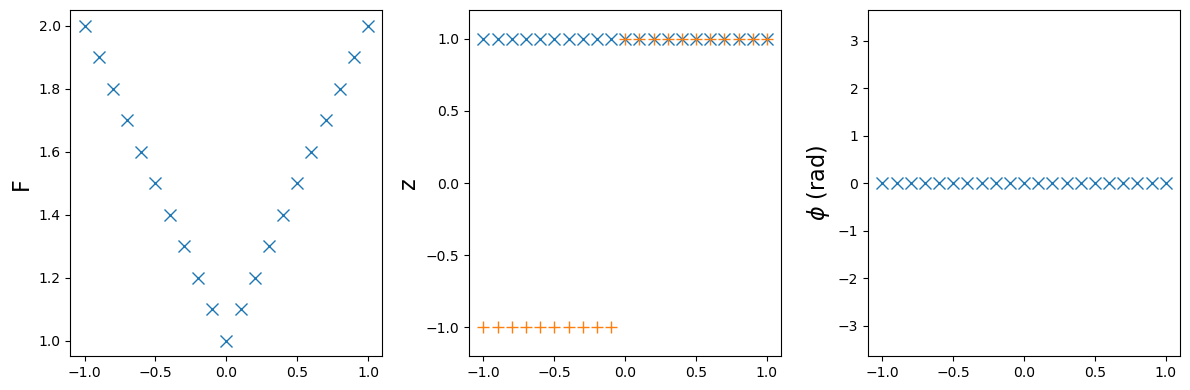

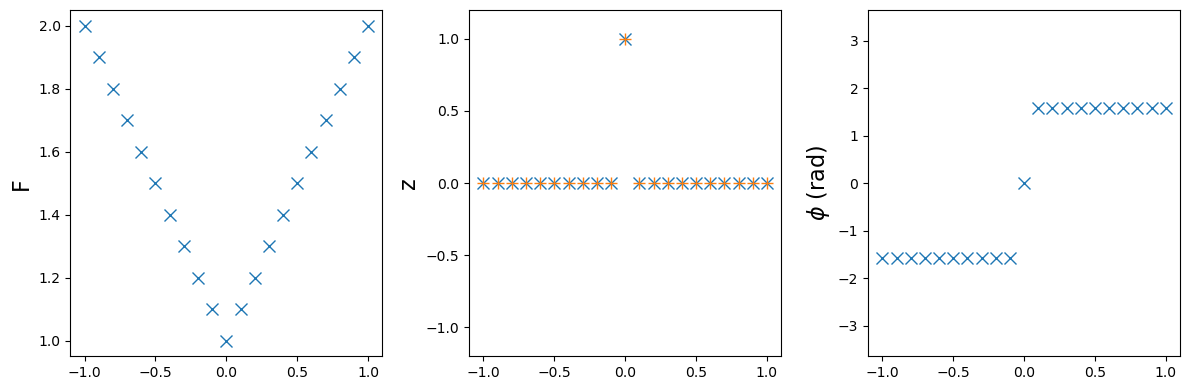

In [2]:
varNames = ["a","c","A","B","D"]

for name in varNames:
    plotter(name,[""],rate=1)

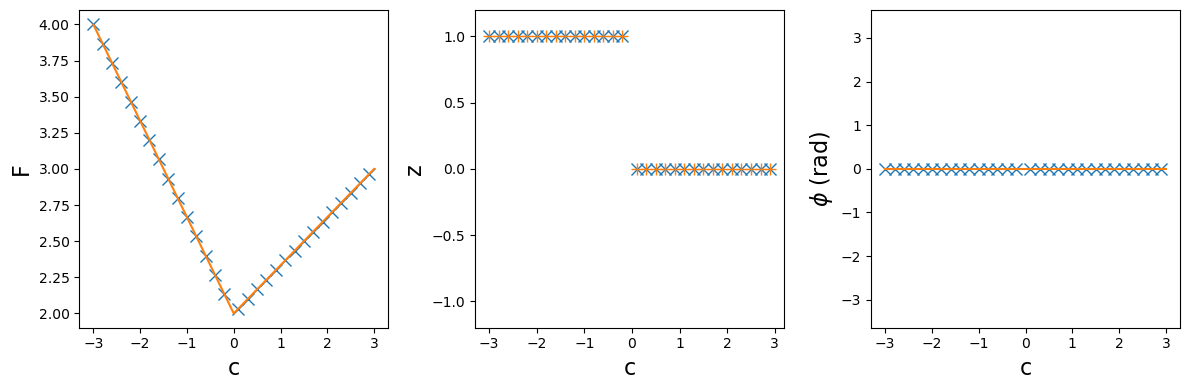

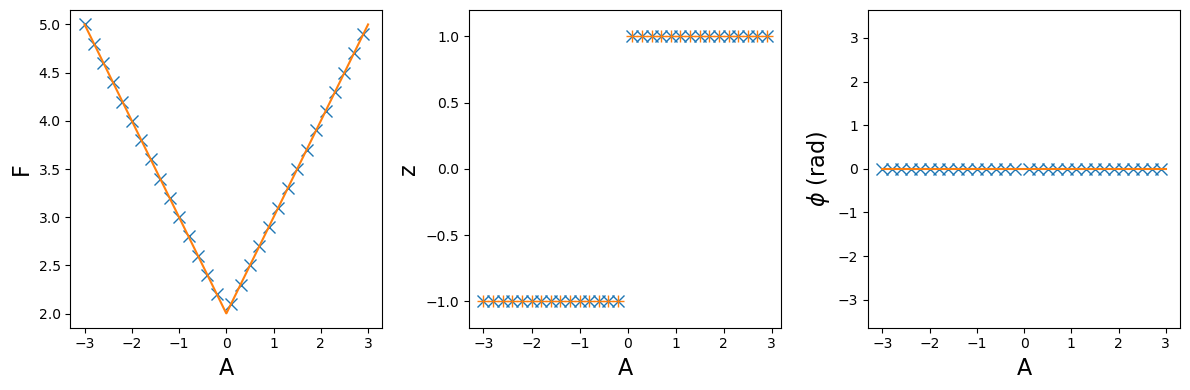

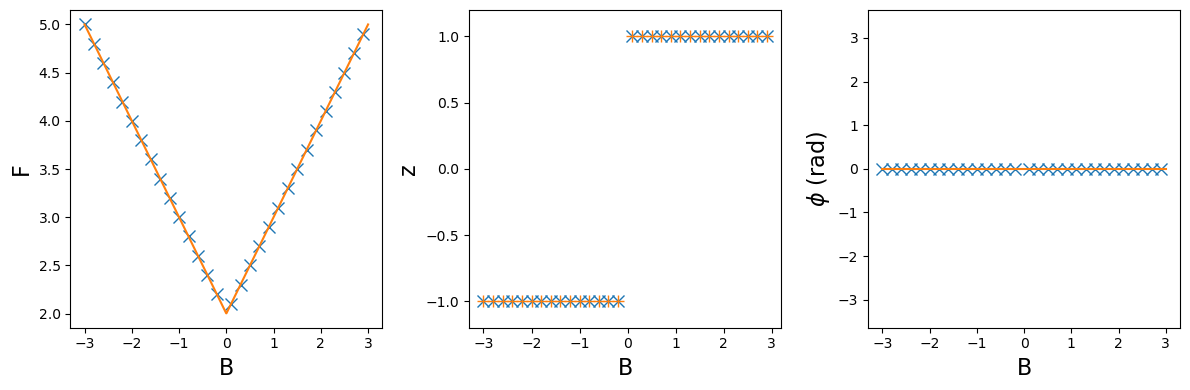

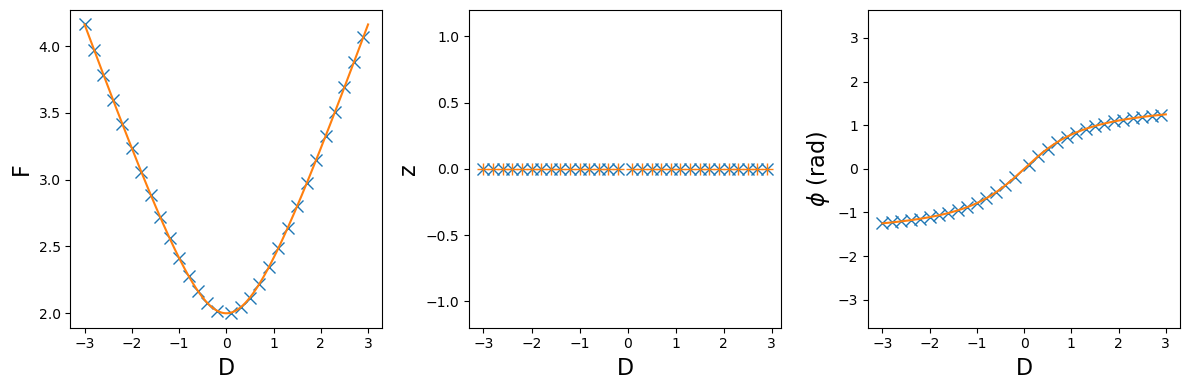

In [3]:
varNames = ["c","A","B","D"]

def F(name,x):
    F = np.zeros_like(x)
    if name == "c":
        F[x>=0] = 2 + x[x>=0]/3
        F[x<0] = 2 - 2*x[x<0]/3
    elif name == "D":
        F = 1 + np.sqrt(x**2+1)
    else:
        F = 2 + np.abs(x)
    return F

def phi(name,x):
    phi = np.zeros_like(x)
    if name == "D":
        phi = np.arctan(x)
    return phi

def ze(name,x):
    pass

def znu(name,x):
    pass

plotter("a",varNames,F=F,phi=phi)

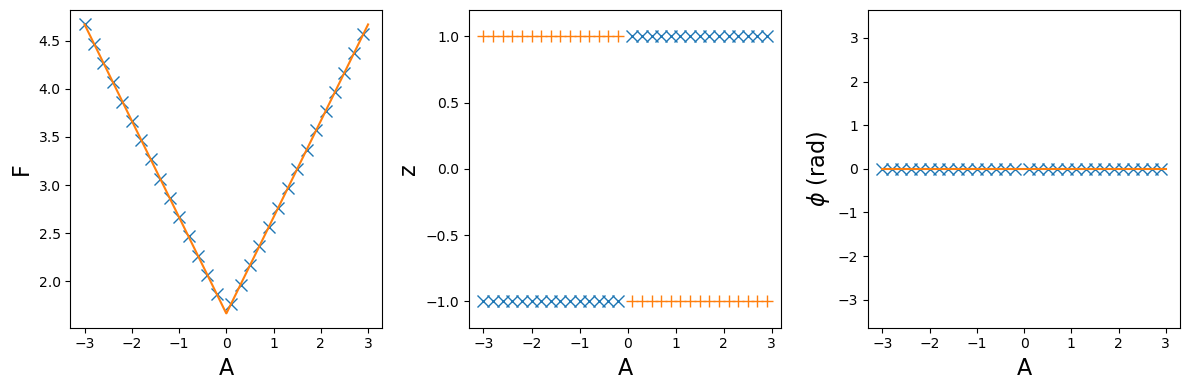

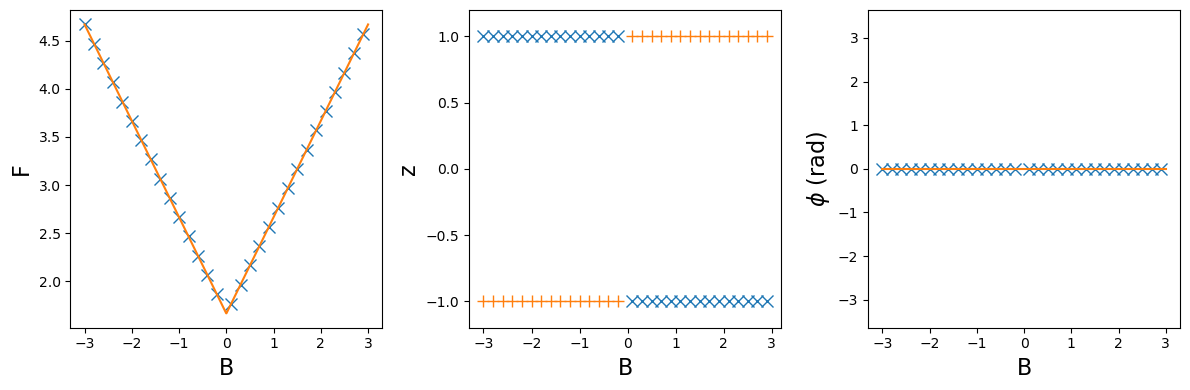

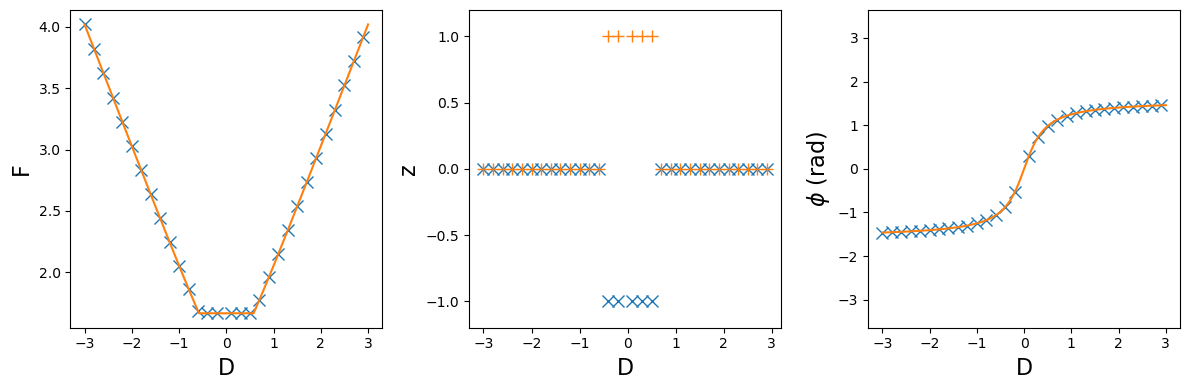

In [4]:
varNames = ["A","B","D"]

def F(name,x):
    F = np.zeros_like(x)
    if name == "D":
        F[np.abs(x)>np.sqrt(1/3)] = 1 + np.sqrt(x[np.abs(x)>np.sqrt(1/3)]**2+1/9)
        F[np.abs(x)<np.sqrt(1/3)] = 5/3
    else:
        F = 5/3 + np.abs(x)
    return F

def phi(name,x):
    phi = np.zeros_like(x)
    if name == "D":
        phi = np.arctan(3*x)
    return phi

plotter("c",varNames,F=F,phi=phi)

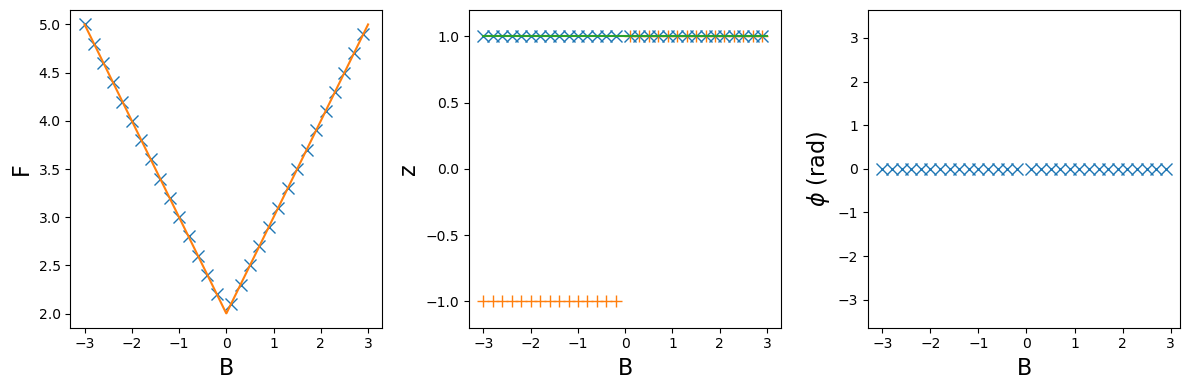

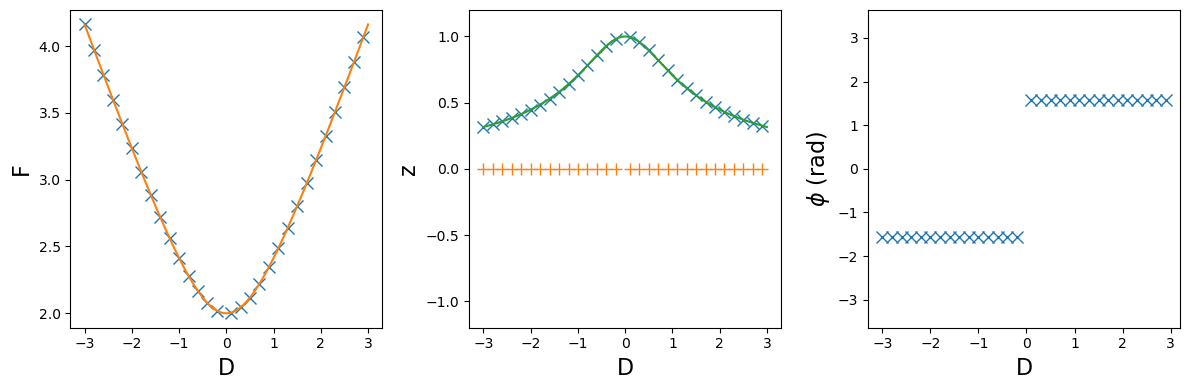

In [5]:
varNames = ["B","D"]

def F(name,x):
    F = np.zeros_like(x)
    if name == "D":
        F = 1+np.sqrt(x**2+1)
    else:
        F = 2 + np.abs(x)
    return F

def ze(name,x):
    phi = np.ones_like(x)
    if name == "D":
        phi = 1/np.sqrt(x**2+1)
    return phi

plotter("A",varNames,F=F,ze=ze)

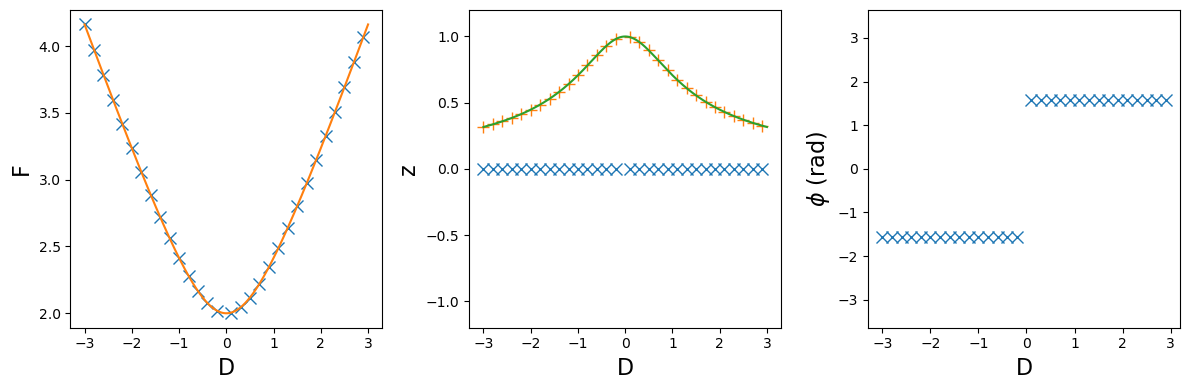

In [6]:
data = np.loadtxt(f"build/BD_maxF_test.txt")

name = "D"

def F(name,x):
    return 1+np.sqrt(x**2+1)

def znu(name,x):
    return 1/np.sqrt(1+x**2)

plotter("B",["D"],F=F,znu=znu)

In [7]:
varNames = ["a","c","A","B","D"]
for i, name1 in enumerate(varNames):
    for namej in varNames[i+1:]:
        print("\\begin{frame}{Maximum of F}{Two variable: %s and %s}" % (name1, namej))
        print("\t\\begin{figure}")
        print("\t\t\\centering")
        print("\t\t\\includegraphics[width=\\textwidth]{plots/%s%s_maxF}" % (name1, namej))
        print("\t\t\\caption{Characteristics of the maximum of F for %s = 1, variable %s, E = 100000 keV, and rest of parameters 0}" % (name1, namej))
        print("\t\\end{figure}")
        print("\\end{frame}")

\begin{frame}{Maximum of F}{Two variable: a and c}
	\begin{figure}
		\centering
		\includegraphics[width=\textwidth]{plots/ac_maxF}
		\caption{Characteristics of the maximum of F for a = 1, variable c, E = 100000 keV, and rest of parameters 0}
	\end{figure}
\end{frame}
\begin{frame}{Maximum of F}{Two variable: a and A}
	\begin{figure}
		\centering
		\includegraphics[width=\textwidth]{plots/aA_maxF}
		\caption{Characteristics of the maximum of F for a = 1, variable A, E = 100000 keV, and rest of parameters 0}
	\end{figure}
\end{frame}
\begin{frame}{Maximum of F}{Two variable: a and B}
	\begin{figure}
		\centering
		\includegraphics[width=\textwidth]{plots/aB_maxF}
		\caption{Characteristics of the maximum of F for a = 1, variable B, E = 100000 keV, and rest of parameters 0}
	\end{figure}
\end{frame}
\begin{frame}{Maximum of F}{Two variable: a and D}
	\begin{figure}
		\centering
		\includegraphics[width=\textwidth]{plots/aD_maxF}
		\caption{Characteristics of the maximum of F for a = 1, 